[IPython Notebook](distance.ipynb) |  [Python Script](distance.py)

Distance
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

/usr/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Relevant Parameters
----------------------------

The 'distance' parameter lives in the 'system' context and is simply the distance between the center of the coordinate system and the observer (at t0)

In [3]:
print b.get_parameter(qualifier='distance', context='system')

Parameter: distance@system
                       Qualifier: distance
                     Description: Distance to the system
                           Value: 1.0 m
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [4]:
print b.get_parameter(qualifier='t0', context='system')

Parameter: t0@system
                       Qualifier: t0
                     Description: Time at which all values are provided
                           Value: 0.0 d
                  Constrained by: 
                      Constrains: mean_anom@binary@component
                      Related to: t0_perpass@binary@component, period@binary@component, mean_anom@binary@component



Influence on Orbits (Positions)
--------------------

The distance has absolutely **NO** effect on the synthetic orbit as the origin of the orbit's coordinate system is such that the barycenter of the system is at 0,0,0 at t0.

To demonstrate this, let's create an 'orb' dataset and compute models at both 1 m and 2 m and then plot the resulting synthetic models.

In [5]:
b.add_dataset('orb', times=np.linspace(0,3,101), dataset='orb01')

<ParameterSet: 3 parameters | contexts: compute, dataset>

In [6]:
b.set_value('distance', 1.0)

In [7]:
b.run_compute(model='dist1')

<ParameterSet: 14 parameters | components: primary, secondary>

In [8]:
b.set_value('distance', 2.0)

In [9]:
b.run_compute(model='dist2')

<ParameterSet: 14 parameters | components: primary, secondary>

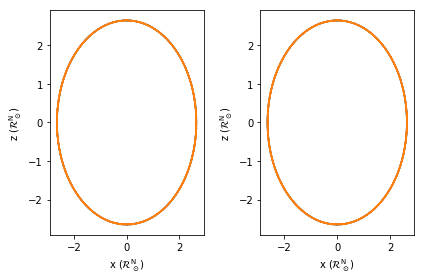

In [10]:
fig = plt.figure()
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

axs, artists = b['orb01'].plot(model='dist1', ax=ax1)
axs, artists = b['orb01'].plot(model='dist2', ax=ax2)

Influence on Light Curves (Fluxes)
-----------------------------------------

Fluxes are, however, affected by distance exactly as you'd expect as inverse of distance squared.

To illustrate this, let's add an 'lc' dataset and compute synthetic fluxes at 1 and 2 m.

In [11]:
b.add_dataset('lc', times=np.linspace(0,3,101), dataset='lc01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

To make things easier to compare, let's disable limb darkening

In [12]:
b.set_value_all('ld_func', 'logarithmic')
b.set_value_all('ld_coeffs', [0.,0.])

In [13]:
b.set_value('distance', 1.0)

In [14]:
b.run_compute(model='dist1')

Thu, 07 Jun 2018 16:06 BUNDLE       WARNING overwriting model: dist1


<ParameterSet: 16 parameters | kinds: orb, lc>

In [15]:
b.set_value('distance', 2.0)

In [16]:
b.run_compute(model='dist2')

Thu, 07 Jun 2018 16:06 BUNDLE       WARNING overwriting model: dist2


<ParameterSet: 16 parameters | kinds: orb, lc>

Since we doubled the distance from 1 to 2 m, we expect the entire light curve at 2 m to be divided by 4 (note the y-scales on the plots below).

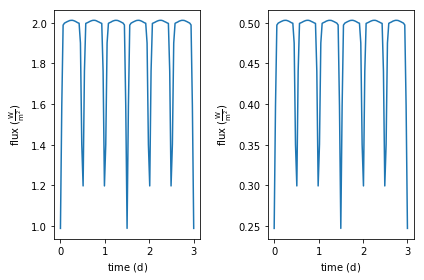

In [17]:
fig = plt.figure()
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

axs, artists = b['lc01'].plot(model='dist1', ax=ax1)
axs, artists = b['lc01'].plot(model='dist2', ax=ax2)

Note that 'pblum' is defined such that a (spherical, non-eclipsed, non-limb darkened) star with a pblum of 4pi will contribute a flux of 1.0 at 1.0 m (the default distance).

For more information, see the [pblum tutorial](pblum)

Influence on Meshes (Intensities)
-----------------------------------------

Distance does not affect the intensities stored in the mesh (including those in relative units).  In other words, like [third light](l3), distance only scales the fluxes.

NOTE: this is different than pblums which **DO** affect the relative intensities.  Again, see the [pblum tutorial](pblum) for more details.

To see this we can run both of our distances again and look at the values of the intensities in the mesh.

In [18]:
b.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 2 parameters | contexts: compute, dataset>

In [19]:
b.set_value('distance', 1.0)

In [20]:
b.run_compute(model='dist1')

Thu, 07 Jun 2018 16:07 BUNDLE       WARNING overwriting model: dist1


<ParameterSet: 94 parameters | kinds: mesh, orb, lc>

In [21]:
b.set_value('distance', 2.0)

In [22]:
b.run_compute(model='dist2')

Thu, 07 Jun 2018 16:07 BUNDLE       WARNING overwriting model: dist2


<ParameterSet: 94 parameters | kinds: mesh, orb, lc>

In [23]:
print "dist1 abs_intensities: ", b.get_value(qualifier='abs_intensities', component='primary', dataset='lc01', model='dist1').mean()
print "dist2 abs_intensities: ", b.get_value(qualifier='abs_intensities', component='primary', dataset='lc01', model='dist2').mean()

dist1 abs_intensities:  42293254637913.5
dist2 abs_intensities:  42293254637913.5


In [24]:
print "dist1 intensities: ", b.get_value(qualifier='intensities', component='primary', dataset='lc01', model='dist1').mean()
print "dist2 intensities: ", b.get_value(qualifier='intensities', component='primary', dataset='lc01', model='dist2').mean()

dist1 intensities:  7.479378102792622e-12
dist2 intensities:  7.479378102792622e-12
